In [2]:
import anndata
import pandas as pd

import cstarpy
import os
import numpy as np
from cstarpy.separation import CellStateTransition
import seaborn as sns

In [3]:
dpd_scores_high_dim=pd.read_pickle("/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_svm/gbm_OUTPUT_svm_sctranform/gbm_OUTPUT_sct_P_dpd_norm_tum.pkl")
norm_s_df_high_dim=pd.read_pickle("/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_svm/gbm_OUTPUT_svm_sctranform/gbm_OUTPUT_sct_P_stv_norm_tum.pkl")

In [4]:
annotated=pd.read_pickle('~/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_sctransform/gbm_OUTPUT_sct_annotated/gbm_OUTPUT_sct_full_annotated.pkl')
display(annotated)

,RP11-34P13.7,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP11-206L10.9,NOC2L,KLHL17,HES4,ISG15,...,RASL12,HYKK,ANPEP,RP11-76E17.3,RP13-516M14.2,ADGRE1,Patients_id,Barcode,Tumor_Normal_annotation,Stage
Index_clean,,,,,,,,,,,,,,,,,,,,,
SF11082_AAACCCAAGCATCAAA-1,0.0,0.0,0.0,0.0,0.693147,0.000000,0.693147,0.693147,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,SF11082,AAACCCAAGCATCAAA-1,Tumor,Primary
SF11082_AAACCCAAGGCACGAT-1,0.0,0.0,0.0,0.0,0.000000,0.693147,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,SF11082,AAACCCAAGGCACGAT-1,Tumor,Primary
SF11082_AAACCCAGTAAGCGGT-1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,SF11082,AAACCCAGTAAGCGGT-1,Tumor,Primary
SF11082_AAACCCAGTTGTGTAC-1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,SF11082,AAACCCAGTTGTGTAC-1,Tumor,Primary
SF11082_AAACCCATCTGGAGAG-1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,SF11082,AAACCCATCTGGAGAG-1,Tumor,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SF9962_TTTGACTGTGCGGATA-1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,SF9962,TTTGACTGTGCGGATA-1,Tumor,Recurrent
SF9962_TTTGATCGTCCGGTGT-1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,SF9962,TTTGATCGTCCGGTGT-1,Normal,Recurrent
SF9962_TTTGATCTCGAGATAA-1,0.0,0.0,0.0,0.0,0.000000,0.693147,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,SF9962,TTTGATCTCGAGATAA-1,Tumor,Recurrent


In [6]:
df_extracted=annotated[['Patients_id','Tumor_Normal_annotation','Stage']]
df_extracted.reset_index(inplace=True)
dpd_scores_high_dim.reset_index(inplace=True)

In [7]:
dpd_scores_high_dim_annotated=dpd_scores_high_dim.merge(df_extracted,on='Index_clean',how='left')

In [8]:
dpd_scores_high_dim_annotated.set_index('Index_clean',inplace=True)

In [9]:
dpd_scores_high_dim_annotated['zeros']=0

In [10]:
dpd_scores_high_dim_annotated

,DPD_p_norm_tum,Patients_id,Tumor_Normal_annotation,Stage,zeros
Index_clean,,,,,
SF11082_AAACCCAAGCATCAAA-1,-0.987373,SF11082,Tumor,Primary,0
SF11082_AAACCCAAGGCACGAT-1,-1.327730,SF11082,Tumor,Primary,0
SF11082_AAACCCAGTAAGCGGT-1,-2.091721,SF11082,Tumor,Primary,0
SF11082_AAACCCAGTTGTGTAC-1,-1.462381,SF11082,Tumor,Primary,0
SF11082_AAACCCATCTGGAGAG-1,-2.682497,SF11082,Tumor,Primary,0
...,...,...,...,...,...
SF9798_TTGTGGACATGAATCC-1,3.515889,SF9798,Normal,Primary,0
SF9798_TTGTTTGGTACGGATG-1,0.599670,SF9798,Normal,Primary,0
SF9798_TTGTTTGGTTTCAGAC-1,0.868358,SF9798,Normal,Primary,0


<Axes: xlabel='DPD_p_norm_tum', ylabel='zeros'>

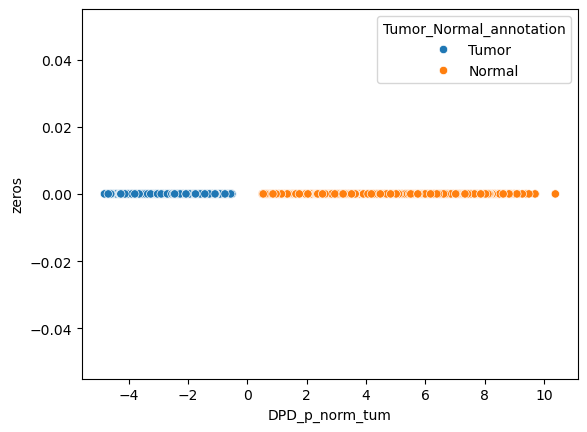

In [13]:
sns.scatterplot(x='DPD_p_norm_tum',y='zeros',data=dpd_scores_high_dim_annotated,hue='Tumor_Normal_annotation')

### Landmark genes results (847 genes overlapping)

In [3]:
dpd_scores_lm=pd.read_pickle("/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_svm/gbm_OUTPUT_svm_sctranform/gbm_OUTPUT_sct_P_dpd_lm_norm_tum.pkl")
norm_s_df_lm=pd.read_pickle("/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_svm/gbm_OUTPUT_svm_sctranform/gbm_OUTPUT_sct_P_stv_lm_norm_tum.pkl")

In [5]:
df_extracted=annotated[['Patients_id','Tumor_Normal_annotation','Stage']]
df_extracted.reset_index(inplace=True)
dpd_scores_lm.reset_index(inplace=True)

In [7]:
dpd_scores_lm_annotated=dpd_scores_lm.merge(df_extracted,on='Index_clean',how='left')

In [9]:
dpd_scores_lm_annotated.set_index('Index_clean',inplace=True)

In [10]:
dpd_scores_lm_annotated['zeros']=0

<Axes: xlabel='DPD_p_norm_tum', ylabel='zeros'>

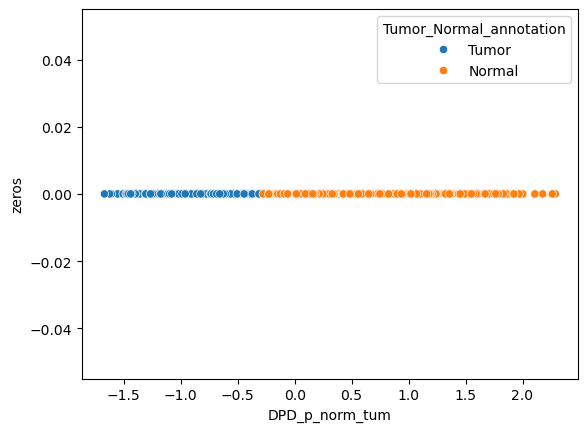

In [11]:
sns.scatterplot(x='DPD_p_norm_tum',y='zeros',data=dpd_scores_lm_annotated,hue='Tumor_Normal_annotation')

<Axes: ylabel='Frequency'>

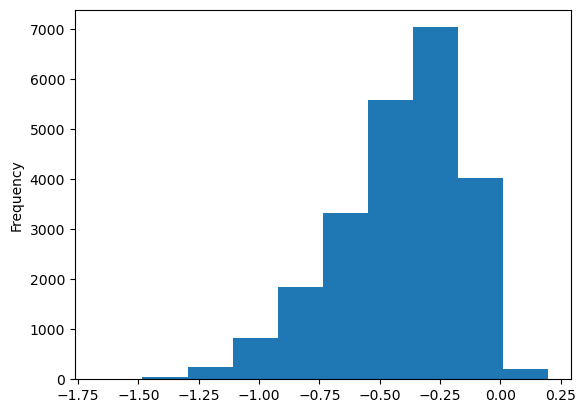

In [14]:
dpd_scores_lm_annotated[dpd_scores_lm_annotated['Tumor_Normal_annotation']=='Tumor']['DPD_p_norm_tum'].plot.hist()